In [5]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import time
from qiskit.providers.aer import QasmSimulator
import numpy as np
from qiskit_experiments.library import randomized_benchmarking as rb
#from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils
from qiskit_experiments.library import StandardRB, InterleavedRB
import qiskit.circuit.library as circuits
import qiskit.circuit.library
from qiskit.circuit import Delay, Instruction
from qiskit.circuit.library.standard_gates import XGate, SXGate, IGate, CCXGate, SGate
from datetime import datetime


# For simulation
from qiskit.providers.aer import AerSimulator

In [6]:
from qiskit import IBMQ
#IBMQ.save_account('befca44219528a564b7f4d3f53707de8985c22fb7b8c969ef2728c830de7c612716e76f41fbc0a52d65f63e71a3a2437948befd3042b1ffab4ced07d573192f1')
IBMQ.load_account()
IBMQ.providers()

ibmqfactory.load_account:WARNING:2022-06-04 17:02:07,834: Credentials are already in use. The existing account in the session will be replaced.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-community', group='qamp', project='spring-22-17')>,
 <AccountProvider for IBMQ(hub='ibm-q-community', group='qamp', project='spring-22-17-2')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='internal', project='reservations')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='squirl')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>,
 <AccountProvider for IBMQ(hub='qc-spring-22-4', group='group-4', project='recdZ7NwFc2tUZtMH')>]

In [7]:
provider=IBMQ.providers()[4]
backend = provider.get_backend('ibmq_toronto')

config = backend.configuration()
backend_job_limit=backend.job_limit()

print("{0} is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}.{6} are the list of connected qubits."
      "{7} can handle maximum {8} circuits(experiments) per job."
      "Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is {9}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates,
                config.coupling_map,
               config.backend_name,
               config.max_experiments,
               backend_job_limit.maximum_jobs))

ibmq_toronto is on version 1.7.4. It has 27 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].[[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]] are the list of connected qubits.ibmq_toronto can handle maximum 900 circuits(experiments) per job.Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is None.


In [8]:
backend.properties(datetime=datetime(2022,5,31,11,41)).gate_error('x',8)

0.00026472263723642124

In [17]:
from datetime import datetime
date = datetime(2021, 5, 31, 10, 19)
CLE=RBUtils.coherence_limit(nQ=1, T1_list=[backend.properties(datetime=date).t1(1)],
T2_list=[backend.properties(datetime=date).t2(1)], gatelen=backend.properties(datetime=date).gate_length('x',(1)))
print(f"CLE is {CLE} at {date}")

CLE is 0.00018575424934544338 at 2021-05-31 10:19:00


In [ ]:
date = datetime.today()
CLE=RBUtils.coherence_limit(nQ=1, T1_list=[backend.properties(datetime=date).t1(1)],
T2_list=[backend.properties(datetime=date).t2(1)], gatelen=backend.properties(datetime=date).gate_length('x',(1)))
print(f"CLE is {CLE} at {date}")

ibmq_toronto
delay_q1
2022-05-31 10:19:09.865990


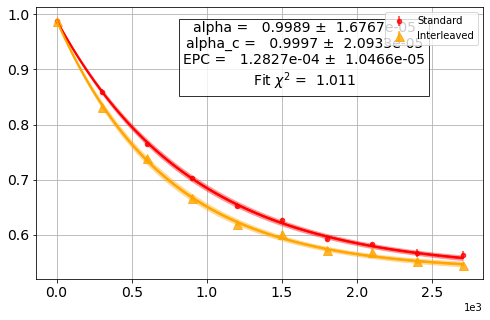

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.4534957737337163, 0.9988898584833152, 0.9997434503875874, 0.5355564218558535]
- χ²: 1.010881202822539
- extra: <4 items>
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.998890+/-0.000017
- χ²: 1.010881202822539
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999743+/-0.000021
- χ²: 1.010881202822539
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000128+/-0.000010
- χ²: 1.010881202822539
- extra: <2 items>
- device_components: ['Q1']
- verified: False


In [5]:
lengths = np.arange(1, 3000, 300)
num_samples = 10
seed = 1010
qubits = [1]
print(backend)
print('delay_q1')
print(datetime.today())

duration=backend.properties().gate_length('x',1)/backend.configuration().dt
interleaved_element = Delay(duration, unit="dt")
int_exp1 = InterleavedRB(interleaved_element, qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

ibmq_toronto
XGate_q1
2022-05-31 10:43:39.236791


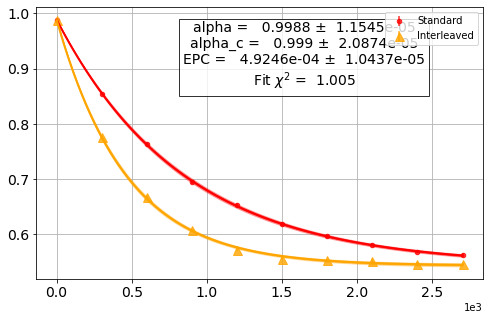

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.4450551038740861, 0.9988176630721838, 0.999015073527631, 0.5438223212139873]
- χ²: 1.0051791202067553
- extra: <4 items>
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.998818+/-0.000012
- χ²: 1.0051791202067553
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999015+/-0.000021
- χ²: 1.0051791202067553
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000492+/-0.000010
- χ²: 1.0051791202067553
- extra: <2 items>
- device_components: ['Q1']
- verified: False
ibmq_toronto
SXGate_q1
2022-05-31 10:58:31.221454


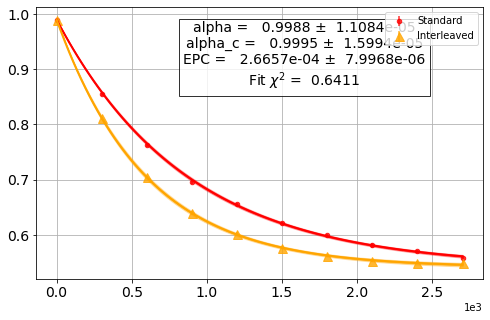

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.44813095410840853, 0.998846848530304, 0.9994668577767277, 0.5414942660163052]
- χ²: 0.6411237780595093
- extra: <4 items>
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.998847+/-0.000011
- χ²: 0.6411237780595093
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999467+/-0.000016
- χ²: 0.6411237780595093
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000267+/-0.000008
- χ²: 0.6411237780595093
- extra: <2 items>
- device_components: ['Q1']
- verified: False
ibmq_toronto
IGate_q1
2022-05-31 11:13:50.368397


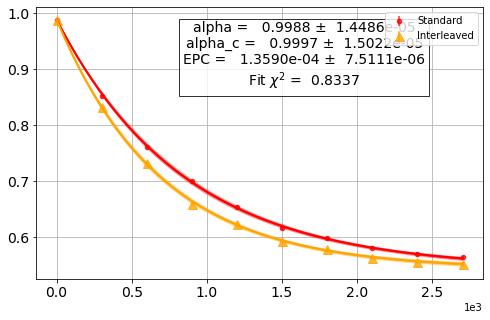

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.44571137360464885, 0.9988274186941583, 0.9997281957810241, 0.5430784602900882]
- χ²: 0.8336896862703421
- extra: <4 items>
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.998827+/-0.000014
- χ²: 0.8336896862703421
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999728+/-0.000015
- χ²: 0.8336896862703421
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000136+/-0.000008
- χ²: 0.8336896862703421
- extra: <2 items>
- device_components: ['Q1']
- verified: False


In [7]:
lengths = np.arange(1, 3000, 300)
num_samples = 10
seed = 1010
qubits = [1]
print(backend)
print('XGate_q1')
print(datetime.today())

int_exp2 = InterleavedRB(
    circuits.XGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

lengths = np.arange(1, 3000, 300)
num_samples = 10
seed = 1010
qubits = [1]
print(backend)
print('SXGate_q1')
print(datetime.today())

int_exp2 = InterleavedRB(
    circuits.SXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

lengths = np.arange(1, 3000, 300)
num_samples = 10
seed = 1010
qubits = [1]
print(backend)
print('IGate_q1')
print(datetime.today())

int_exp2 = InterleavedRB(
    circuits.IGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)


In [9]:
date=datetime.today()
CLE=RBUtils.coherence_limit(nQ=1, T1_list=[backend.properties().t1(1)],
T2_list=[backend.properties().t2(1)], gatelen=backend.properties().gate_length('x',(1)))
print(f"CLE is {CLE} at {date}")

CLE is 0.00016336405141312293 at 2022-05-31 11:32:55.047920


<ipython-input-9-b0f27cb74f0a>:2: DeprecationWarning: The method 'coherence_limit' of 'RBUtils' class has been deprecated and will be removed after Qiskit Experiments 0.4. Please use coherence_limit_error function that can handle three or more qubits instead.
  CLE=RBUtils.coherence_limit(nQ=1, T1_list=[backend.properties().t1(1)],


# CLE(0.0001633)~I(0.0001390)~D(0.0001287)
# <SX(0.0002665)<X(0.0004926)

ibmq_toronto
delay_q8
2022-05-31 11:41:14.819878


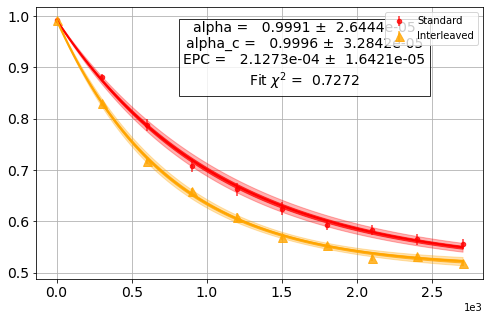

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.48240119356525574, 0.9990739653478503, 0.9995745398373925, 0.5101383093294226]
- χ²: 0.727177655650265
- extra: <4 items>
- device_components: ['Q8']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.999074+/-0.000026
- χ²: 0.727177655650265
- device_components: ['Q8']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.999575+/-0.000033
- χ²: 0.727177655650265
- device_components: ['Q8']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000213+/-0.000016
- χ²: 0.727177655650265
- extra: <2 items>
- device_components: ['Q8']
- verified: False
CLE is 0.00016336405141312293 at 2022-05-31 11:32:55.047920
ibmq_toronto
XGate_q8
2022-05-31 15:35:44.178092


<ipython-input-10-957f0d0136c3>:20: DeprecationWarning: The method 'coherence_limit' of 'RBUtils' class has been deprecated and will be removed after Qiskit Experiments 0.4. Please use coherence_limit_error function that can handle three or more qubits instead.
  CLE=RBUtils.coherence_limit(nQ=1, T1_list=[backend.properties().t1(1)],
Job data not added for errorred job [Job ID: 6295b82abc0d024642dbecb2]
Error message: Generic error invoking the remote services. Error code: 500.
Analysis callback failed [Analysis ID: 385f9b0718cb4d79b0628ef12ded9339]:
Traceback (most recent call last):
  File "c:\users\kimje\forked-qiskit-experiments\qiskit_experiments\database_service\db_experiment_data.py", line 530, in _run_analysis_callback
    "Running analysis callback '%s' [Experiment ID: %s][Analysis Callback ID: %s]",
  File "c:\users\kimje\forked-qiskit-experiments\qiskit_experiments\framework\base_analysis.py", line 157, in run_analysis
    results, figures = analysis._run_analysis(expdata)
 

IndexError: list index out of range

In [10]:
lengths = np.arange(1, 3000, 300)
num_samples = 10
seed = 1010
qubits = [8]
print(backend)
print('delay_q8')
print(datetime.today())

duration=backend.properties().gate_length('x',8)/backend.configuration().dt
interleaved_element = Delay(duration, unit="dt")
int_exp1 = InterleavedRB(interleaved_element, qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)
CLE=RBUtils.coherence_limit(nQ=1, T1_list=[backend.properties().t1(1)],
T2_list=[backend.properties().t2(1)], gatelen=backend.properties().gate_length('x',(1)))
print(f"CLE is {CLE} at {date}")

lengths = np.arange(1, 3000, 300)
num_samples = 10
seed = 1010
qubits = [8]
print(backend)
print('XGate_q8')
print(datetime.today())

int_exp2 = InterleavedRB(
    circuits.XGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

CLE=RBUtils.coherence_limit(nQ=1, T1_list=[backend.properties().t1(1)],
T2_list=[backend.properties().t2(1)], gatelen=backend.properties().gate_length('x',(1)))
print(f"CLE is {CLE} at {date}")

lengths = np.arange(1, 3000, 300)
num_samples = 10
seed = 1010
qubits = [8]
print(backend)
print('SXGate_q8')
print(datetime.today())

int_exp2 = InterleavedRB(
    circuits.SXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

CLE=RBUtils.coherence_limit(nQ=1, T1_list=[backend.properties().t1(1)],
T2_list=[backend.properties().t2(1)], gatelen=backend.properties().gate_length('x',(1)))
print(f"CLE is {CLE} at {date}")

lengths = np.arange(1, 3000, 300)
num_samples = 10
seed = 1010
qubits = [8]
print(backend)
print('IGate_q8')
print(datetime.today())

int_exp2 = InterleavedRB(
    circuits.IGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

CLE=RBUtils.coherence_limit(nQ=1, T1_list=[backend.properties().t1(1)],
T2_list=[backend.properties().t2(1)], gatelen=backend.properties().gate_length('x',(1)))
print(f"CLE is {CLE} at {date}")